 Association Rule Mining finds interesting associations and relationships among transactions. How frequenctly a itemset (combination of items) occurs in a set of transactions based on purchase behavior of consumers.

Transactions can be retail sales transactions, banking transactions, stock market transactions, social media transactions, etc. Popular Algorithm is Market Basket Analysis predominantly used in Retail

Market Basket Analysis identifies frequent itemsets in transactions and groups them as frequent purchases and widely used in ecommerce also. Apriori Algorithm is fundamental of Market Basket Analysis

Apriori algorithm is a data mining algorithm that mines frequent itemsets as rules and these rules are higly correlated items which consumers purchase frerquently together. Apriori creates rules that are combination of items purchased.

Apriori Algorithm has 3 main components: Support, Lift, Confidence



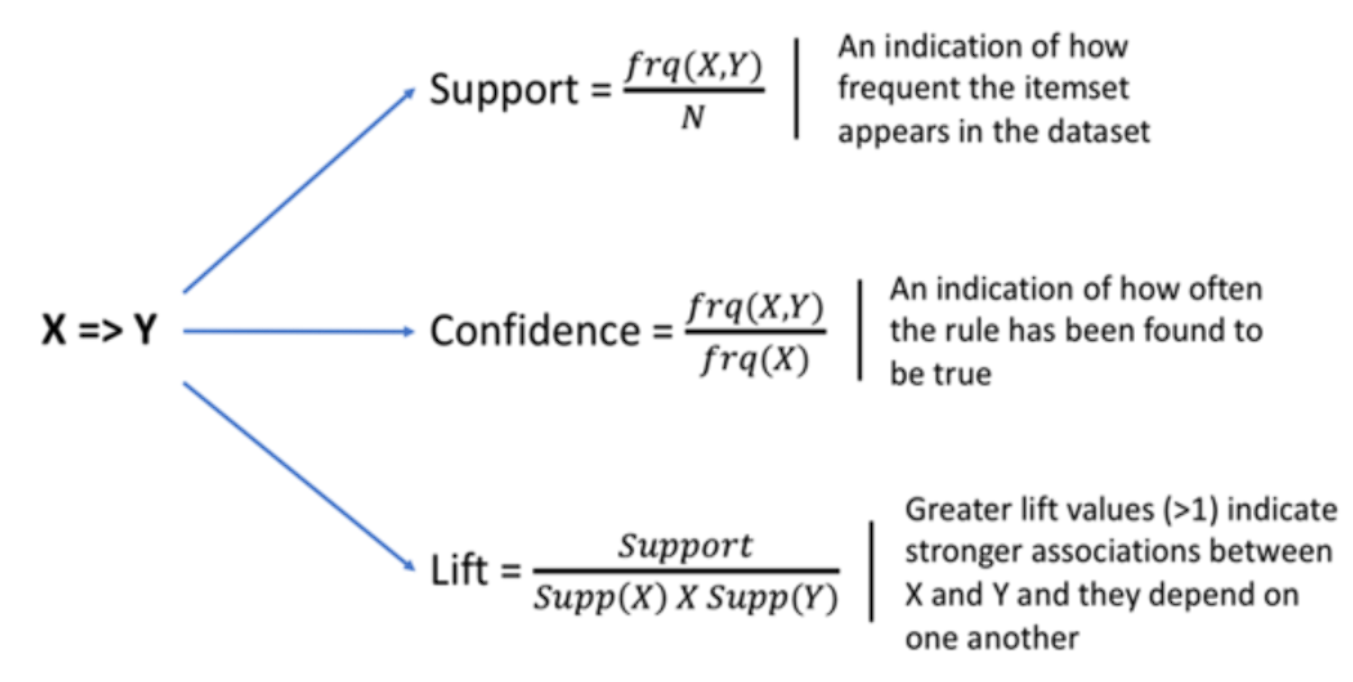

In [1]:
# Support assesses the overall popularity of a given product
#            Transactions comprising the item
# Support = -----------------------------------
#                   Total Transactions
# A high support value indicates that item is present in most purchases and it is a very critical 
# product

# Confidence is the likelihood of different purchase combinations
#                                  Transactions comprising Bread and Milk
# Confidence(Bread -----> Milk) = -------------------------------------------
#                                   Transactions comprising of Bread only
# Confidence is what percentage of customers who bought Bread also bought Milk

# Lift refers to increase in ratio of sales of milk when bread is sold
#        Confidence(Bread -----> Milk)
# Lift = ------------------------------
#           Suppport(Bread)
# Lift greater than 1 indicates milk is often bought with bread

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\zaida\OneDrive\Desktop\Machine Learning\transactions.csv")

In [4]:
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Restructure data into list of list

In [7]:
l=[]
for i in range(1,7500):
    l.append([str(df.values[i,j]) for j in range(0,20)])

In [9]:
from apyori import apriori

In [10]:
assoc_rules=apriori(l,min_support=0.003,min_confidence=0.50,min_lift=3)
# min_support,, min_confidence,min_lift has to be given and these parameters decide how many
# rules to be generated

In [11]:
assoc_rules=list(assoc_rules)

In [12]:
len(assoc_rules)

28

In [13]:
assoc_rules[0:5]

[RelationRecord(items=frozenset({'spaghetti', 'cereals', 'ground beef'}), support=0.0030670756100813442, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cereals', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.6764705882352942, lift=3.884267183136654)]),
 RelationRecord(items=frozenset({'chicken', 'olive oil', 'milk'}), support=0.0036004800640085347, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken', 'olive oil'}), items_add=frozenset({'milk'}), confidence=0.5, lift=3.8575102880658436)]),
 RelationRecord(items=frozenset({'spaghetti', 'cooking oil', 'ground beef'}), support=0.004800640085344712, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cooking oil', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2811201050098444)]),
 RelationRecord(items=frozenset({'red wine', 'spaghetti', 'eggs'}), support=0.003733831177490332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red 

In [14]:
from mlxtend.preprocessing import TransactionEncoder

In [15]:
encoder=TransactionEncoder().fit(l)

In [16]:
onehot=encoder.transform(l)

In [17]:
transact_encode=pd.DataFrame(onehot,columns=encoder.columns_).drop('nan',axis=1)

In [18]:
from mlxtend.frequent_patterns import apriori

In [19]:
freq_items=apriori(transact_encode,min_support=0.003,max_len=3,use_colnames=True)

In [20]:
freq_items.sort_values(by="support",ascending=False).head(10)

,support,itemsets
69,0.238298,(mineral water)
34,0.179624,(eggs)
96,0.174157,(spaghetti)
40,0.170956,(french fries)
23,0.163889,(chocolate)
51,0.132018,(green tea)
68,0.129617,(milk)
52,0.098280,(ground beef)
46,0.095346,(frozen vegetables)
78,0.095079,(pancakes)


In [21]:
from mlxtend.frequent_patterns import association_rules

In [22]:
association_rules=association_rules(freq_items,metric="lift",min_threshold=3)

In [23]:
association_rules.sort_values(by="lift",ascending=False).head(10)
# (mineral water, whole wheat pasta) ---->(olive oil) 
# antecedent                               consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
174,"(mineral water, whole wheat pasta)",(olive oil),0.009601,0.065742,0.003867,0.402778,6.126634,0.003236,1.564339,0.844890
177,(olive oil),"(mineral water, whole wheat pasta)",0.065742,0.009601,0.003867,0.058824,6.126634,0.003236,1.052299,0.895661
143,"(spaghetti, ground beef)",(tomato sauce),0.039205,0.014135,0.003067,0.078231,5.534495,0.002513,1.069536,0.852747
146,(tomato sauce),"(spaghetti, ground beef)",0.014135,0.039205,0.003067,0.216981,5.534495,0.002513,1.227039,0.831062
12,(fromage blanc),(honey),0.013602,0.047340,0.003334,0.245098,5.177437,0.002690,1.261966,0.817980
13,(honey),(fromage blanc),0.047340,0.013602,0.003334,0.070423,5.177437,0.002690,1.061125,0.846948
147,(ground beef),"(tomato sauce, spaghetti)",0.098280,0.006268,0.003067,0.031208,4.979272,0.002451,1.025743,0.886270
142,"(tomato sauce, spaghetti)",(ground beef),0.006268,0.098280,0.003067,0.489362,4.979272,0.002451,1.765869,0.804208
3,(chicken),(light cream),0.060008,0.015602,0.004534,0.075556,4.842659,0.003598,1.064854,0.844158
2,(light cream),(chicken),0.015602,0.060008,0.004534,0.290598,4.842659,0.003598,1.325049,0.806078


In [24]:
# Zhangs Metric lies between -1(disassociation) and 1(association) - Strength of Relationship
# Conviction Metric >1 Product X is strongly dependent on presence of Product Y and 
# <1 is Product X is not Strongly dependent on presence of Product Y